### Try out different clustering models in the given dataset. Find the optimum number of clusters in each model and create the model with optimum number of clusters. Also learn about dB scan clustering and implement it.

In [103]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Loading data to python environment 

data = pd.read_csv("Wine_clust.csv")

In [105]:
# Determining number of rows and columns of data

data.shape

(178, 13)

In [106]:
# Displaying first five rows of data

data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [107]:
# Checking if any null values are present in data

data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### There are no missing values in data

In [108]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### Outlier Detection

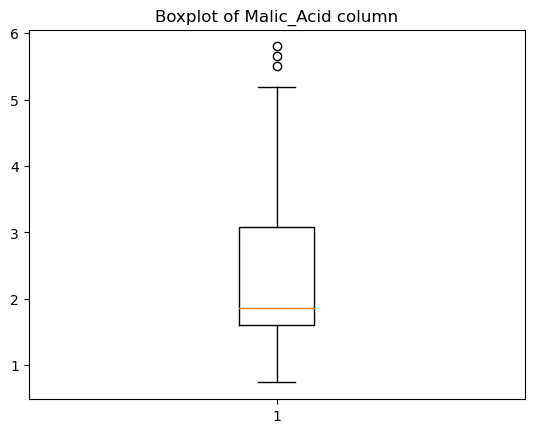

In [109]:
# Detecting outliers in Malic_Acid column using IQR method
plt.boxplot(data['Malic_Acid'])
plt.title('Boxplot of Malic_Acid column')
plt.show()

In [110]:
Q1=np.percentile(data['Malic_Acid'],25,interpolation='midpoint')
Q2=np.percentile(data['Malic_Acid'],50,interpolation='midpoint')
Q3=np.percentile(data['Malic_Acid'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.605
1.8650000000000002
3.065


In [111]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

1.46
-0.585
5.255


In [112]:
outlier = []
for x in data['Malic_Acid']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [113]:
# Finding the index of outliers
ind2 =data[(data["Malic_Acid"] > up_limit)|(data["Malic_Acid"] < low_limit)].index 
print(ind2)
# droping outlier values
data.drop(ind2, inplace=True)

Int64Index([123, 137, 173], dtype='int64')


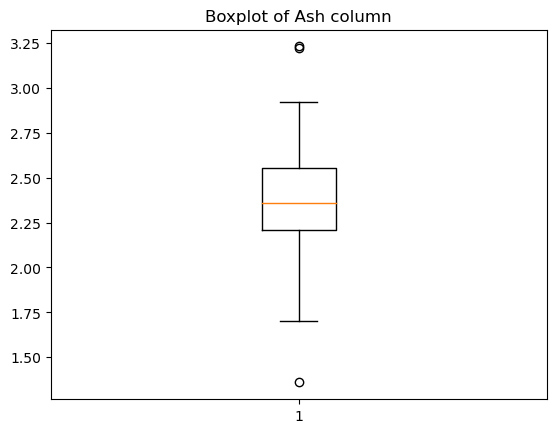

In [114]:
# Detecting outliers in Ash column using IQR method
plt.boxplot(data['Ash'])
plt.title('Boxplot of Ash column')
plt.show()

In [115]:
Q1=np.percentile(data['Ash'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.21
2.36
2.5549999999999997


In [116]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

0.34499999999999975
1.6925000000000003
3.0724999999999993


In [117]:
outlier = []
for x in data['Ash']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [118]:
# Finding the index of outliers
ind3 =data[(data["Ash"] > up_limit)|(data["Ash"] < low_limit)].index 
print(ind3)
# droping outlier values
data.drop(ind3, inplace=True)

Int64Index([25, 59, 121], dtype='int64')


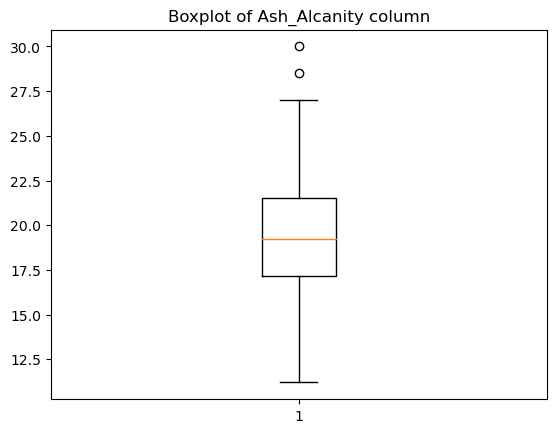

In [119]:
# Detecting outliers in Ash_Alcanity column using IQR method
plt.boxplot(data['Ash_Alcanity'])
plt.title('Boxplot of Ash_Alcanity column')
plt.show()

In [120]:
Q1=np.percentile(data['Ash_Alcanity'],25,interpolation='midpoint')
Q2=np.percentile(data['Ash_Alcanity'],50,interpolation='midpoint')
Q3=np.percentile(data['Ash_Alcanity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

17.15
19.25
21.5


In [121]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

4.350000000000001
10.624999999999996
28.025000000000002


In [122]:
outlier = []
for x in data['Ash_Alcanity']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [123]:
# Finding the index of outliers
ind4 =data[(data["Ash_Alcanity"] > up_limit)|(data["Ash_Alcanity"] < low_limit)].index 
print(ind4)
# droping outlier values
data.drop(ind4, inplace=True)

Int64Index([73, 127], dtype='int64')


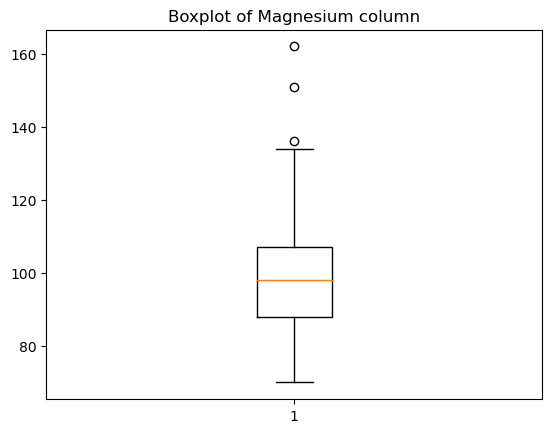

In [124]:
# Detecting outliers in Magnesium column using IQR method
plt.boxplot(data['Magnesium'])
plt.title('Boxplot of Magnesium column')
plt.show()

In [125]:
Q1=np.percentile(data['Magnesium'],25,interpolation='midpoint')
Q2=np.percentile(data['Magnesium'],50,interpolation='midpoint')
Q3=np.percentile(data['Magnesium'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

88.0
98.0
107.0


In [126]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

19.0
59.5
135.5


In [127]:
outlier = []
for x in data['Magnesium']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [128]:
# Finding the index of outliers
ind5 =data[(data["Magnesium"] > up_limit)|(data["Magnesium"] < low_limit)].index 
print(ind5)
# droping outlier values
data.drop(ind5, inplace=True)

Int64Index([69, 78, 95], dtype='int64')


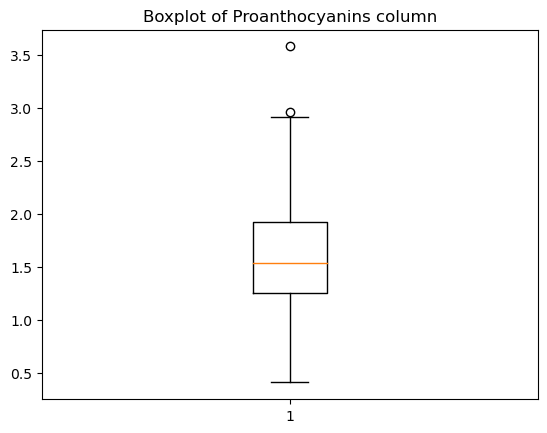

In [129]:
# Detecting outliers in Proanthocyanins column using IQR method
plt.boxplot(data['Proanthocyanins'])
plt.title('Boxplot of Proanthocyanins column')
plt.show()

In [130]:
Q1=np.percentile(data['Proanthocyanins'],25,interpolation='midpoint')
Q2=np.percentile(data['Proanthocyanins'],50,interpolation='midpoint')
Q3=np.percentile(data['Proanthocyanins'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.25
1.54
1.9249999999999998


In [131]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

0.6749999999999998
0.23750000000000027
2.9374999999999996


In [132]:
outlier = []
for x in data['Proanthocyanins']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [133]:
# Finding the index of outliers
ind6 =data[(data["Proanthocyanins"] > up_limit)|(data["Proanthocyanins"] < low_limit)].index 
print(ind6)
# droping outlier values
data.drop(ind6, inplace=True)

Int64Index([14, 110], dtype='int64')


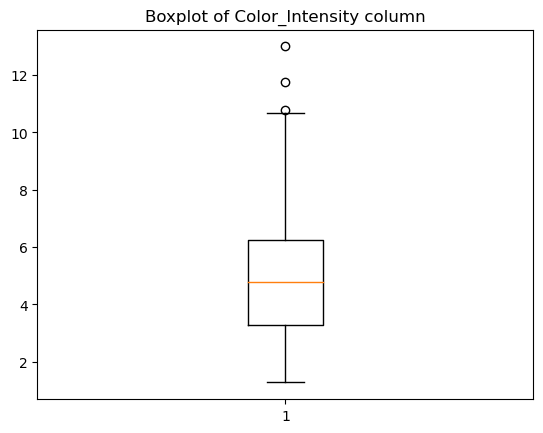

In [134]:
# Detecting outliers in Color_Intensity column using IQR method
plt.boxplot(data['Color_Intensity'])
plt.title('Boxplot of Color_Intensity column')
plt.show()

In [135]:
Q1=np.percentile(data['Color_Intensity'],25,interpolation='midpoint')
Q2=np.percentile(data['Color_Intensity'],50,interpolation='midpoint')
Q3=np.percentile(data['Color_Intensity'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

3.27
4.8
6.25


In [136]:
IQR=Q3-Q1
print(IQR)
low_limit = Q1 - 1.5*IQR
up_limit = Q3 + 1.5*IQR
print(low_limit)
print(up_limit)

2.98
-1.1999999999999997
10.719999999999999


In [137]:
outlier = []
for x in data['Color_Intensity']:
    if((x>up_limit) or (x<low_limit)):
        outlier.append(x)

In [138]:
# Finding the index of outliers
ind7 =data[(data["Color_Intensity"] > up_limit)|(data["Color_Intensity"] < low_limit)].index 
print(ind7)
# droping outlier values
data.drop(ind7, inplace=True)

Int64Index([151, 158, 159], dtype='int64')


### Standard Scaling

In [139]:
# Performing standard scaling on data since different columns have data in different ranges

from sklearn.preprocessing import StandardScaler
stdsclr = StandardScaler()
scaled_data = stdsclr.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data,columns = list(data))

In [140]:
# Returns description of sacled data 

scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,1.302113e-16,7.538551e-17,-8.676187e-16,-2.782411e-16,-3.909767e-16,-6.836095e-16,-3.303256e-16,-1.713307e-16,-6.956027e-17,5.345518e-17,6.044548e-16,-3.591092e-16,4.865792e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-2.483944e+00,-1.500016e+00,-2.756335e+00,-2.740590e+00,-2.304379e+00,-2.081712e+00,-1.730330e+00,-1.889564e+00,-2.210335e+00,-1.732270e+00,-1.882576e+00,-1.905388e+00,-1.494188e+00
25%,-8.132043e-01,-6.776442e-01,-5.862114e-01,-7.140753e-01,-8.492967e-01,-9.221336e-01,-8.435216e-01,-7.393946e-01,-5.843228e-01,-8.161711e-01,-7.550316e-01,-8.726247e-01,-7.923269e-01
50%,4.710212e-02,-4.464264e-01,-1.512638e-02,-8.923335e-02,-8.133688e-02,8.549975e-02,1.099255e-01,-1.643099e-01,-7.161617e-02,-1.227191e-01,3.759859e-02,2.235848e-01,-2.418787e-01
75%,8.294822e-01,7.334990e-01,7.220925e-01,5.693838e-01,6.057851e-01,8.292291e-01,8.890865e-01,5.750847e-01,6.412902e-01,5.417423e-01,7.074269e-01,7.840263e-01,8.424571e-01
max,2.253975e+00,2.742948e+00,2.310747e+00,2.595898e+00,2.869246e+00,2.556601e+00,1.950181e+00,2.464649e+00,2.672585e+00,2.627896e+00,3.342085e+00,1.943682e+00,2.928325e+00


### Unsupervised Learning

### K-Means Clustering

C:\Users\kavya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


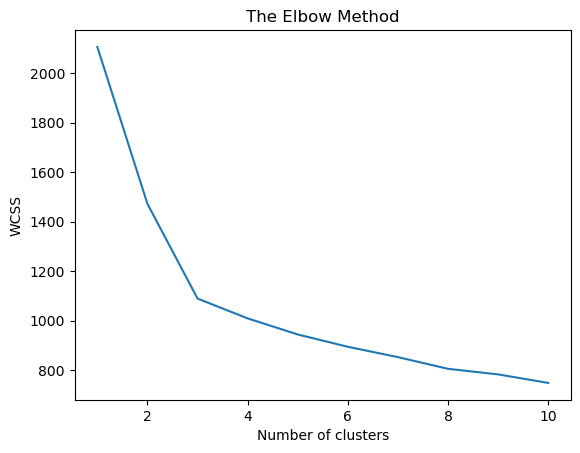

In [141]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++',random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Cluster value of K-Means is 3 according to the graph

In [142]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++',random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

In [143]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

#### Silhouette Score

In [144]:
from sklearn.metrics import silhouette_score

In [145]:
sil_avg = silhouette_score(scaled_data,y_kmeans)

In [146]:
sil_avg

0.30147345842264595

#### For K-Means clustering model,cluster value is 3 and silhouette score is 0.30147345842264595

### Agglomerative Hierarchical Clustering

In [147]:
import scipy.cluster.hierarchy as sch

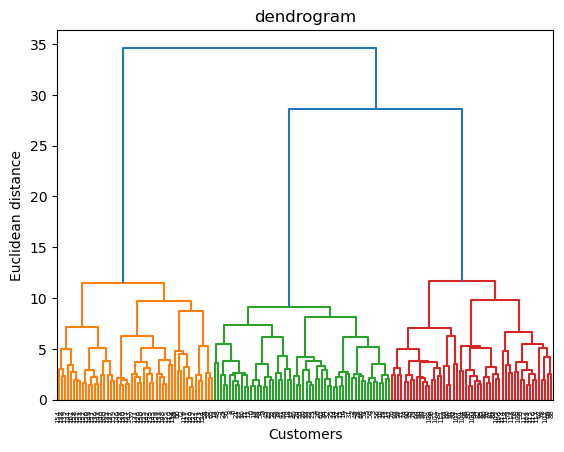

In [148]:
dendrogram = sch.dendrogram(sch.linkage(scaled_data,method ='ward'))
plt.title('dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

#### Cluster value for Agglomerative Hierarchical Clustering is 3

In [149]:
from sklearn.cluster import AgglomerativeClustering

In [150]:
hc= AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage = 'ward')
y_hc = hc.fit_predict(scaled_data)

In [151]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

#### Silhouette Score

In [152]:
from sklearn.metrics import silhouette_score

In [153]:
sil_avg = silhouette_score(scaled_data,y_hc)

In [154]:
sil_avg

0.29849505398402654

#### For Agglomerative Hierarchical clustering model,cluster value is 3 and silhouette score is 0.29849505398402654

### Computing eps and min_samples values for DBSCAN model

#### To determine the optimal ε parameter, we need to compute the k-nearest neighbor (kNN) distances (average distance of every X
#### data point to its k-nearest neighbors) of an input dataset using the k-nearest neighbor method. For finding the
####  k-nearest neighbor,we need to use the sklearn.neighbors.NearestNeighbors function.
#### As there are 13 features in data,min_samples can be calculated as 2 * 13 = 26

In [155]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 27 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors=27).fit(scaled_data)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(scaled_data)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

In [156]:
nbrs.kneighbors(scaled_data)

(array([[0.        , 1.33048006, 1.64974901, ..., 2.97187579, 2.98164788,
         3.13566894],
        [0.        , 1.98519683, 2.45247814, ..., 3.53051535, 3.55023786,
         3.57864248],
        [0.        , 2.05172134, 2.15661357, ..., 3.12010816, 3.1475731 ,
         3.21225684],
        ...,
        [0.        , 1.81897629, 1.93258607, ..., 3.75622292, 3.80053545,
         3.83529916],
        [0.        , 1.93258607, 2.41343142, ..., 3.65470208, 3.67840255,
         3.77672981],
        [0.        , 2.26589621, 2.49699039, ..., 3.72742149, 3.77162436,
         3.7841956 ]]),
 array([[  0,  19,  54, ...,  40,  44,  33],
        [  1,  36,  25, ...,  44,  38,  34],
        [  2,  46,  49, ...,  23,  40,   9],
        ...,
        [159, 137, 160, ..., 120, 124, 147],
        [160, 159, 140, ..., 144, 155, 126],
        [161, 158, 136, ..., 159, 131, 126]], dtype=int64))

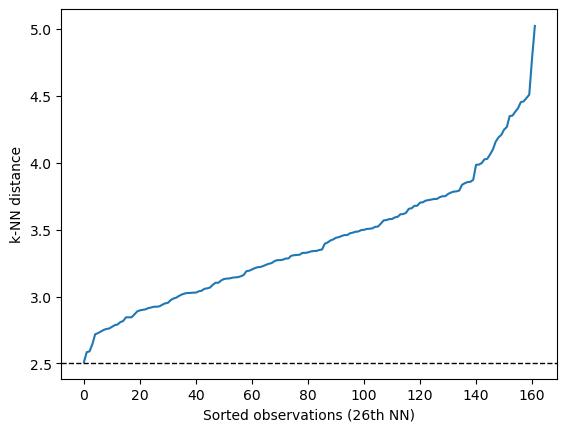

In [157]:
k_dist = sort_neigh_dist[:, 26]
plt.plot(k_dist)
plt.axhline(y=2.5, linewidth=1, linestyle='dashed', color='k')
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (26th NN)")
plt.show()

### DBSCAN Clustering 

In [158]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 2.5,min_samples = 26).fit(scaled_data)

In [159]:
# get cluster labels
clusters.labels_

array([-1, -1,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0, -1,
       -1, -1,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [160]:
# check unique clusters
set(clusters.labels_)

{-1, 0}

In [161]:
# -1 value represents noisy points could not be assigned to any cluster

In [162]:
#Silhouette Score
sil_avg = silhouette_score(scaled_data,clusters.labels_)

In [163]:
sil_avg

0.09074051030313186

#### Silhouette score for DBSCAN model is 0.09074051030313186

In [165]:
from collections import Counter
Counter(clusters.labels_)

Counter({-1: 136, 0: 26})

#### DBSCAN clustering identified 2 clusters with given parameters. The largest cluster 0 has 26 data points and the smallest
#### cluster -1 has 136 data points.
#### -1 represents noisy cluster